In [23]:
import pandas as pd
import numpy as np
import re
import nltk
import string
import json
from datetime import datetime
from nltk.corpus import stopwords
import spacy
import matplotlib.pyplot as plt
import plotly
import seaborn as sns
import plotly.graph_objects as go
from spacy.lang.en.stop_words import STOP_WORDS
from gensim.parsing.preprocessing import remove_stopwords

In [24]:
nlp = spacy.load('en_core_web_sm')

In [25]:
df = pd.read_csv("Combined_Data_1.csv")

# Sentiment Score

In [26]:
#TextBlob_Sentiment_Analysis
import textblob
from textblob import TextBlob

In [27]:
#polarity_Score
df['Polarity_Score'] = df['text'].apply(lambda x : TextBlob(x).sentiment.polarity)

#subjectivity score
df['Subjectivity_Score'] = df['text'].apply(lambda x : TextBlob(x).sentiment.subjectivity)

In [28]:
df.head()

,Unnamed: 0,id,created_at,text,Polarity_Score,Subjectivity_Score
0,0,1266005058996580354,2020-05-28 13:55:01+00:00,the education independent school standards cor...,0.25,0.3125
1,1,1266005058057011202,2020-05-28 13:55:01+00:00,total covid tests performed in thailand cases...,0.00,0.7500
2,2,1266005057142734850,2020-05-28 13:55:01+00:00,notomorrowprep with talk of a second wave of c...,0.00,0.0000
3,3,1266005057063043079,2020-05-28 13:55:01+00:00,the us coronavirus death toll if you can even ...,0.00,0.5000
4,4,1266005055842537472,2020-05-28 13:55:01+00:00,after two months of serving as west virginias ...,0.00,0.0000


In [29]:
#Eliminate uncessary columns
df = df.drop(['Unnamed: 0','id'],axis=1)

In [30]:
df.head()

,created_at,text,Polarity_Score,Subjectivity_Score
0,2020-05-28 13:55:01+00:00,the education independent school standards cor...,0.25,0.3125
1,2020-05-28 13:55:01+00:00,total covid tests performed in thailand cases...,0.00,0.7500
2,2020-05-28 13:55:01+00:00,notomorrowprep with talk of a second wave of c...,0.00,0.0000
3,2020-05-28 13:55:01+00:00,the us coronavirus death toll if you can even ...,0.00,0.5000
4,2020-05-28 13:55:01+00:00,after two months of serving as west virginias ...,0.00,0.0000


In [31]:
df.dtypes

created_at             object
text                   object
Polarity_Score        float64
Subjectivity_Score    float64
dtype: object

In [32]:
df['created_at'] = pd.to_datetime(df['created_at']).dt.date

In [33]:
df.head()

,created_at,text,Polarity_Score,Subjectivity_Score
0,2020-05-28,the education independent school standards cor...,0.25,0.3125
1,2020-05-28,total covid tests performed in thailand cases...,0.00,0.7500
2,2020-05-28,notomorrowprep with talk of a second wave of c...,0.00,0.0000
3,2020-05-28,the us coronavirus death toll if you can even ...,0.00,0.5000
4,2020-05-28,after two months of serving as west virginias ...,0.00,0.0000


Text(0.5, 1.0, 'Polarity_Score')

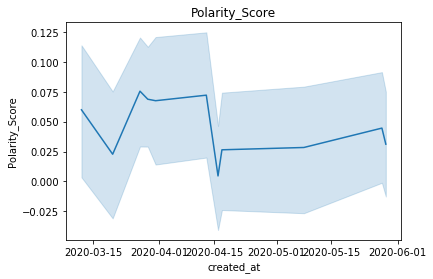

In [34]:
#Time Series Plot of polarity score
#Overall results showed tweets are neutral but slightly positive about 

sns.lineplot(x="created_at", y="Polarity_Score", data=df)
plt.title('Polarity_Score')

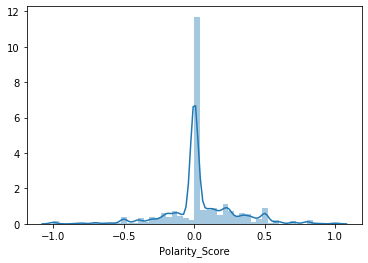

In [35]:
#Distribution Plot
ax = sns.distplot(df.Polarity_Score)

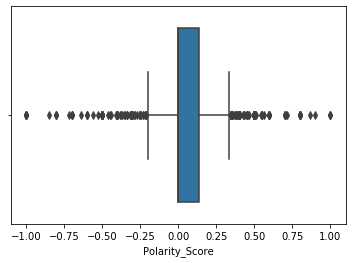

In [36]:
#BoxPlot
ax = sns.boxplot(x=df["Polarity_Score"])

In [37]:
#Overall Polarity Score As of today
df.Polarity_Score.mean()

0.04562153540019783

In [38]:
#Overall Subjectivity Score As of today
df.Subjectivity_Score.mean()

0.3027774847822624

# Word Cloud

In [39]:
import matplotlib.pyplot as plt
import wordcloud
from wordcloud import WordCloud

In [40]:
Text = df['text']

In [41]:
#Joining all text into one text variable
All_Tweets = " ".join(df['text'])

In [42]:
#Remove Stopwords
All_Tweets = remove_stopwords(All_Tweets)

In [43]:
#Remove "Covid", "Covid 19" & "Coronavirus" text because we would like to know words other than the subject
All_Tweets = All_Tweets.replace('Covid', '')
All_Tweets = All_Tweets.replace('covid', '')
All_Tweets = All_Tweets.replace('covid-19', '')
All_Tweets = All_Tweets.replace('wuhanvirus', '')
All_Tweets = All_Tweets.replace('coronavirus', '')

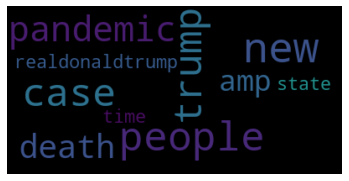

In [44]:
wordcloud = WordCloud(max_font_size=50, max_words=10, background_color="black").generate(All_Tweets)
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()